## Utils

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

In [2]:
def extract_gas_data(text):
    """
    Extracts gas usage information from a given text and returns a pandas DataFrame.
    """
    pattern = (
        r"### Testing with (?P<users>\d+) users ###.*?"
        r"Gas for Data Submission: (?P<data_submission_tot>\d+).*?"
        r"Gas for Data Submission \(avg\): (?P<data_submission_avg>[\d.]+).*?"
        r"Gas for Data Verification: (?P<data_verification_tot>\d+).*?"
        r"Gas for Data Verification \(avg\): (?P<data_verification_avg>[\d.]+).*?"
        r"Gas for Reward Distribution: (?P<reward_distribution>\d+).*?"
        r"Total Gas Used: (?P<total>\d+)"
    )
    
    matches = re.finditer(pattern, text, re.DOTALL)
    
    data = []
    for match in matches:
        data.append([
            int(match.group("users")),
            int(match.group("data_submission_tot")),
            float(match.group("data_submission_avg")),
            int(match.group("data_verification_tot")),
            float(match.group("data_verification_avg")),
            int(match.group("reward_distribution")),
            int(match.group("total"))
        ])
    
    columns = [
        "Number of Users", "Data Submission (tot)", "Data Submission (avg)",
        "Data Verification (tot)", "Data Verification (avg)", "Reward Distribution", "Total"
    ]
    
    return pd.DataFrame(data, columns=columns)

In [3]:
colors = {
    "Data Submission": "#1f77b4",  # Blue
    "Data Verification": "#ff7f0e",  # Orange
    "Reward Distribution": "#2ca02c",  # Green
    "Total": "#d62728"  # Red
}

## TEST 1: Small

In [4]:
# The text input
text = """
### Testing with 1 users ###
Gas for Data Submission: 84366
Gas for Data Submission (avg): 84366
Gas for Data Verification: 126707
Gas for Data Verification (avg): 126707
Gas for Reward Distribution: 78498
Total Gas Used: 289571

### Testing with 2 users ###
Gas for Data Submission: 168732
Gas for Data Submission (avg): 84366
Gas for Data Verification: 219214
Gas for Data Verification (avg): 109607
Gas for Reward Distribution: 101554
Total Gas Used: 489500

### Testing with 3 users ###
Gas for Data Submission: 253098
Gas for Data Submission (avg): 84366
Gas for Data Verification: 311721
Gas for Data Verification (avg): 103907
Gas for Reward Distribution: 124610
Total Gas Used: 689429

### Testing with 4 users ###
Gas for Data Submission: 337464
Gas for Data Submission (avg): 84366
Gas for Data Verification: 404228
Gas for Data Verification (avg): 101057
Gas for Reward Distribution: 147666
Total Gas Used: 889358

### Testing with 5 users ###
Gas for Data Submission: 421830
Gas for Data Submission (avg): 84366
Gas for Data Verification: 496735
Gas for Data Verification (avg): 99347
Gas for Reward Distribution: 170722
Total Gas Used: 1089287

### Testing with 6 users ###
Gas for Data Submission: 506196
Gas for Data Submission (avg): 84366
Gas for Data Verification: 589242
Gas for Data Verification (avg): 98207
Gas for Reward Distribution: 193778
Total Gas Used: 1289216

### Testing with 7 users ###
Gas for Data Submission: 590562
Gas for Data Submission (avg): 84366
Gas for Data Verification: 681737
Gas for Data Verification (avg): 97391
Gas for Reward Distribution: 216834
Total Gas Used: 1489133

### Testing with 8 users ###
Gas for Data Submission: 674928
Gas for Data Submission (avg): 84366
Gas for Data Verification: 774244
Gas for Data Verification (avg): 96780.5
Gas for Reward Distribution: 239890
Total Gas Used: 1689062

### Testing with 9 users ###
Gas for Data Submission: 759294
Gas for Data Submission (avg): 84366
Gas for Data Verification: 866751
Gas for Data Verification (avg): 96305.66666666667
Gas for Reward Distribution: 262946
Total Gas Used: 1888991
"""

In [5]:
# Extract data and create DataFrame
df_small = extract_gas_data(text)

df_small

,Number of Users,Data Submission (tot),Data Submission (avg),Data Verification (tot),Data Verification (avg),Reward Distribution,Total
0,1,84366,84366.0,126707,126707.000000,78498,289571
1,2,168732,84366.0,219214,109607.000000,101554,489500
2,3,253098,84366.0,311721,103907.000000,124610,689429
3,4,337464,84366.0,404228,101057.000000,147666,889358
4,5,421830,84366.0,496735,99347.000000,170722,1089287
5,6,506196,84366.0,589242,98207.000000,193778,1289216
6,7,590562,84366.0,681737,97391.000000,216834,1489133
7,8,674928,84366.0,774244,96780.500000,239890,1689062
8,9,759294,84366.0,866751,96305.666667,262946,1888991


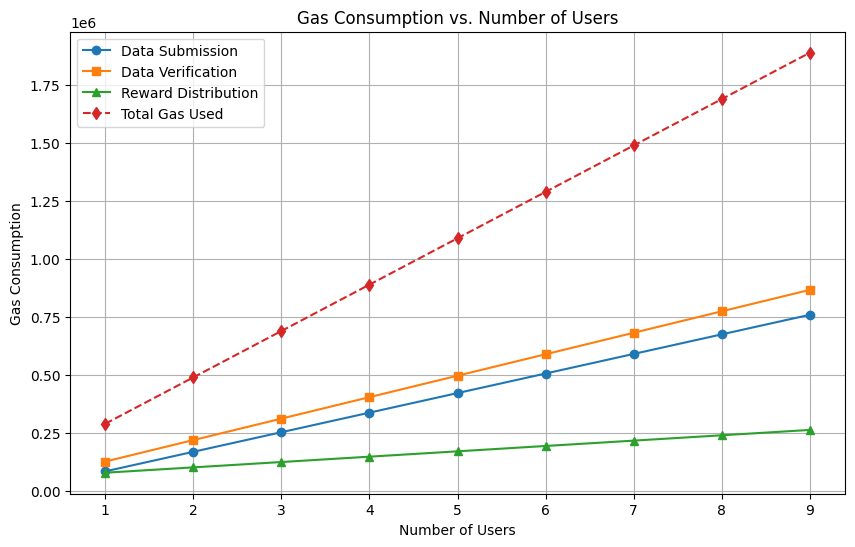

In [6]:
# Show how gas consumption scales with the number of users
plt.figure(figsize=(10, 6))

plt.plot(df_small["Number of Users"], df_small["Data Submission (tot)"], label="Data Submission", marker='o', linestyle='-', color=colors["Data Submission"])
plt.plot(df_small["Number of Users"], df_small["Data Verification (tot)"], label="Data Verification", marker='s', linestyle='-', color=colors["Data Verification"])
plt.plot(df_small["Number of Users"], df_small["Reward Distribution"], label="Reward Distribution", marker='^', linestyle='-', color=colors["Reward Distribution"])
plt.plot(df_small["Number of Users"], df_small["Total"], label="Total Gas Used", marker='d', linestyle='--', color=colors["Total"])

plt.xlabel("Number of Users")
plt.ylabel("Gas Consumption")
plt.title("Gas Consumption vs. Number of Users")
plt.legend()
plt.grid(True)
plt.show()

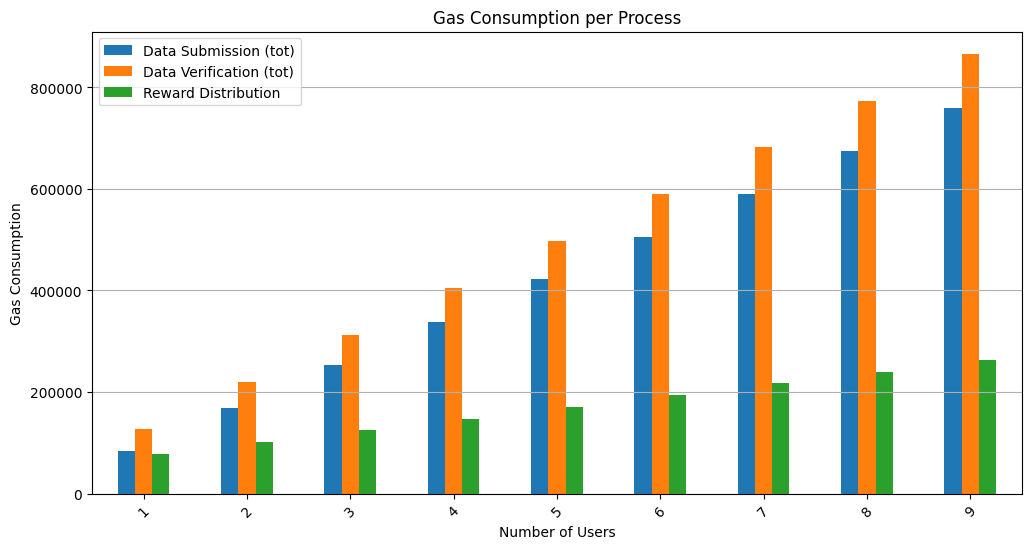

In [7]:
# Compare gas usage across different processes
df_small.set_index("Number of Users")[["Data Submission (tot)", "Data Verification (tot)", "Reward Distribution"]].plot(
    kind="bar", figsize=(12, 6), color=[colors["Data Submission"], colors["Data Verification"], colors["Reward Distribution"]])

plt.xlabel("Number of Users")
plt.ylabel("Gas Consumption")
plt.title("Gas Consumption per Process")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

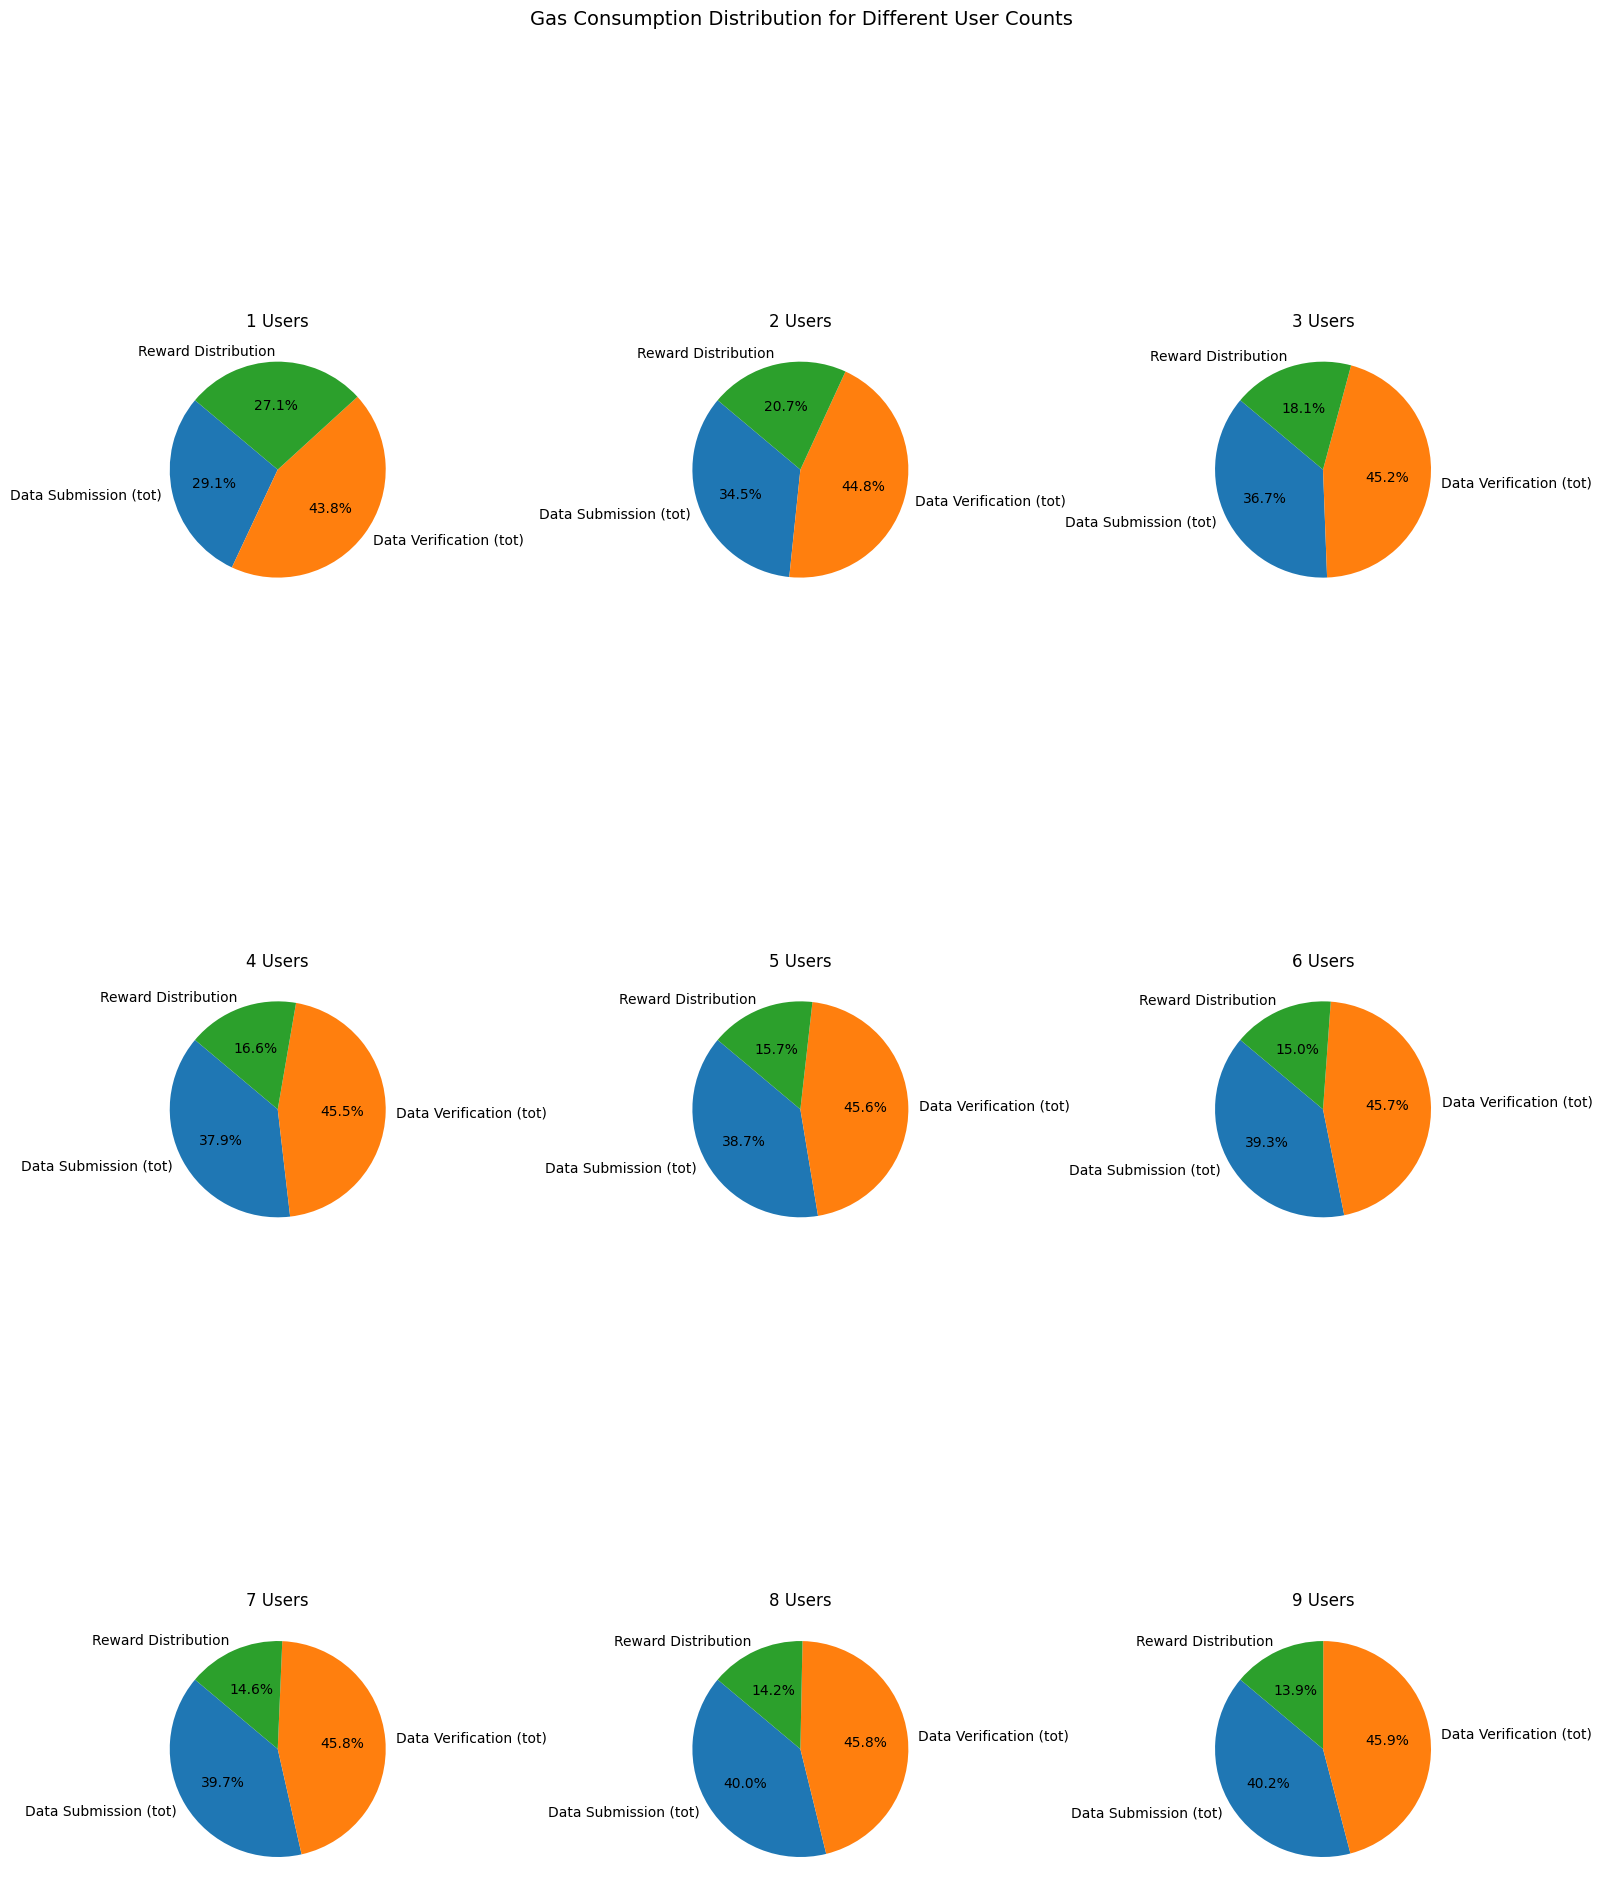

In [8]:
# Show the proportion of gas used in different steps for different number of users
# Define user counts to plot
user_counts = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Define the number of rows and columns for subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 20))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Iterate through each user count and plot a pie chart
for i, user_count in enumerate(user_counts):
    subset = df_small[df_small["Number of Users"] == user_count][["Data Submission (tot)", 
                                                      "Data Verification (tot)", 
                                                      "Reward Distribution"]].iloc[0]

    # Create pie chart
    axes[i].pie(subset, labels=subset.index, autopct='%1.1f%%', 
                colors=[colors["Data Submission"], colors["Data Verification"], colors["Reward Distribution"]], startangle=140)
    axes[i].set_title(f"{user_count} Users")

# Adjust layout
plt.tight_layout()
plt.suptitle("Gas Consumption Distribution for Different User Counts", fontsize=14, y=1.05)
plt.show()

## TEST 2: Medium

In [9]:
# The text input
text = """
### Testing with 10 users ###
Gas for Data Submission: 843660
Gas for Data Submission (avg): 84366
Gas for Data Verification: 959258
Gas for Data Verification (avg): 95925.8
Gas for Reward Distribution: 286002
Total Gas Used: 2088920

### Testing with 20 users ###
Gas for Data Submission: 1687440
Gas for Data Submission (avg): 84372
Gas for Data Verification: 1884328
Gas for Data Verification (avg): 94216.4
Gas for Reward Distribution: 516562
Total Gas Used: 4088330

### Testing with 30 users ###
Gas for Data Submission: 2531220
Gas for Data Submission (avg): 84374
Gas for Data Verification: 2809374
Gas for Data Verification (avg): 93645.8
Gas for Reward Distribution: 747122
Total Gas Used: 6087716

### Testing with 40 users ###
Gas for Data Submission: 3375000
Gas for Data Submission (avg): 84375
Gas for Data Verification: 3734444
Gas for Data Verification (avg): 93361.1
Gas for Reward Distribution: 977682
Total Gas Used: 8087126

### Testing with 50 users ###
Gas for Data Submission: 4218780
Gas for Data Submission (avg): 84375.6
Gas for Data Verification: 4659502
Gas for Data Verification (avg): 93190.04
Gas for Reward Distribution: 1208242
Total Gas Used: 10086524

### Testing with 60 users ###
Gas for Data Submission: 5062560
Gas for Data Submission (avg): 84376
Gas for Data Verification: 5584572
Gas for Data Verification (avg): 93076.2
Gas for Reward Distribution: 1438802
Total Gas Used: 12085934

### Testing with 70 users ###
Gas for Data Submission: 5906340
Gas for Data Submission (avg): 84376.28571428571
Gas for Data Verification: 6509642
Gas for Data Verification (avg): 92994.88571428572
Gas for Reward Distribution: 1669362
Total Gas Used: 14085344

### Testing with 80 users ###
Gas for Data Submission: 6750120
Gas for Data Submission (avg): 84376.5
Gas for Data Verification: 7434712
Gas for Data Verification (avg): 92933.9
Gas for Reward Distribution: 1899922
Total Gas Used: 16084754

### Testing with 90 users ###
Gas for Data Submission: 7593900
Gas for Data Submission (avg): 84376.66666666667
Gas for Data Verification: 8359758
Gas for Data Verification (avg): 92886.2
Gas for Reward Distribution: 2130482
Total Gas Used: 18084140
"""

In [10]:
# Extract data and create DataFrame
df_medium = extract_gas_data(text)

df_medium

,Number of Users,Data Submission (tot),Data Submission (avg),Data Verification (tot),Data Verification (avg),Reward Distribution,Total
0,10,843660,84366.000000,959258,95925.800000,286002,2088920
1,20,1687440,84372.000000,1884328,94216.400000,516562,4088330
2,30,2531220,84374.000000,2809374,93645.800000,747122,6087716
3,40,3375000,84375.000000,3734444,93361.100000,977682,8087126
4,50,4218780,84375.600000,4659502,93190.040000,1208242,10086524
5,60,5062560,84376.000000,5584572,93076.200000,1438802,12085934
6,70,5906340,84376.285714,6509642,92994.885714,1669362,14085344
7,80,6750120,84376.500000,7434712,92933.900000,1899922,16084754
8,90,7593900,84376.666667,8359758,92886.200000,2130482,18084140


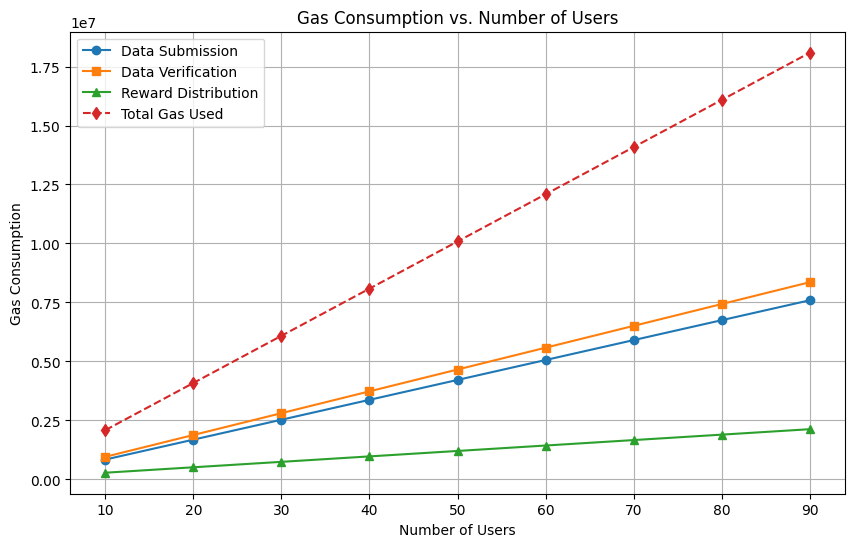

In [11]:
# Show how gas consumption scales with the number of users
plt.figure(figsize=(10, 6))

plt.plot(df_medium["Number of Users"], df_medium["Data Submission (tot)"], label="Data Submission", marker='o', linestyle='-', color=colors["Data Submission"])
plt.plot(df_medium["Number of Users"], df_medium["Data Verification (tot)"], label="Data Verification", marker='s', linestyle='-', color=colors["Data Verification"])
plt.plot(df_medium["Number of Users"], df_medium["Reward Distribution"], label="Reward Distribution", marker='^', linestyle='-', color=colors["Reward Distribution"])
plt.plot(df_medium["Number of Users"], df_medium["Total"], label="Total Gas Used", marker='d', linestyle='--', color=colors["Total"])

plt.xlabel("Number of Users")
plt.ylabel("Gas Consumption")
plt.title("Gas Consumption vs. Number of Users")
plt.legend()
plt.grid(True)
plt.show()

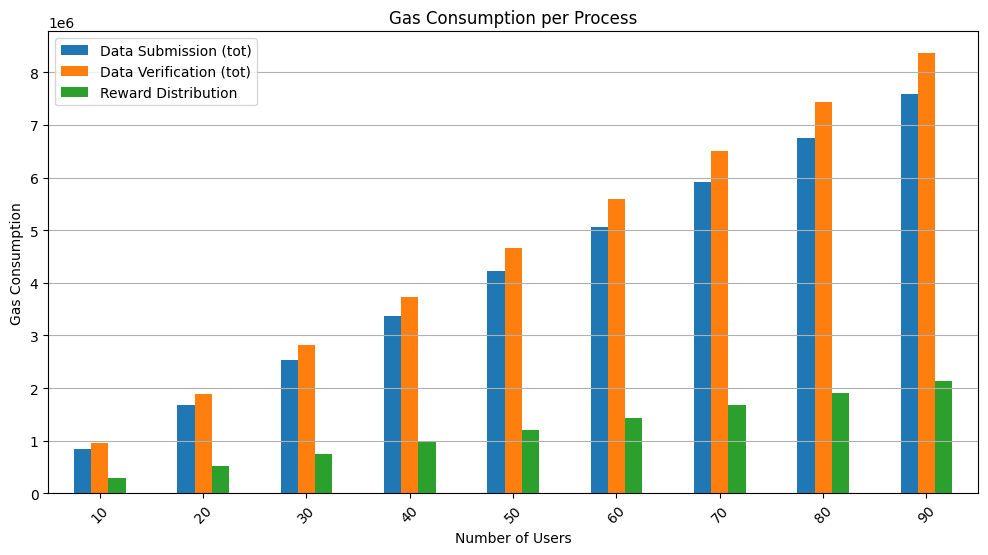

In [12]:
# Compare gas usage across different processes
df_medium.set_index("Number of Users")[["Data Submission (tot)", "Data Verification (tot)", "Reward Distribution"]].plot(
    kind="bar", figsize=(12, 6), color=[colors["Data Submission"], colors["Data Verification"], colors["Reward Distribution"]])

plt.xlabel("Number of Users")
plt.ylabel("Gas Consumption")
plt.title("Gas Consumption per Process")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

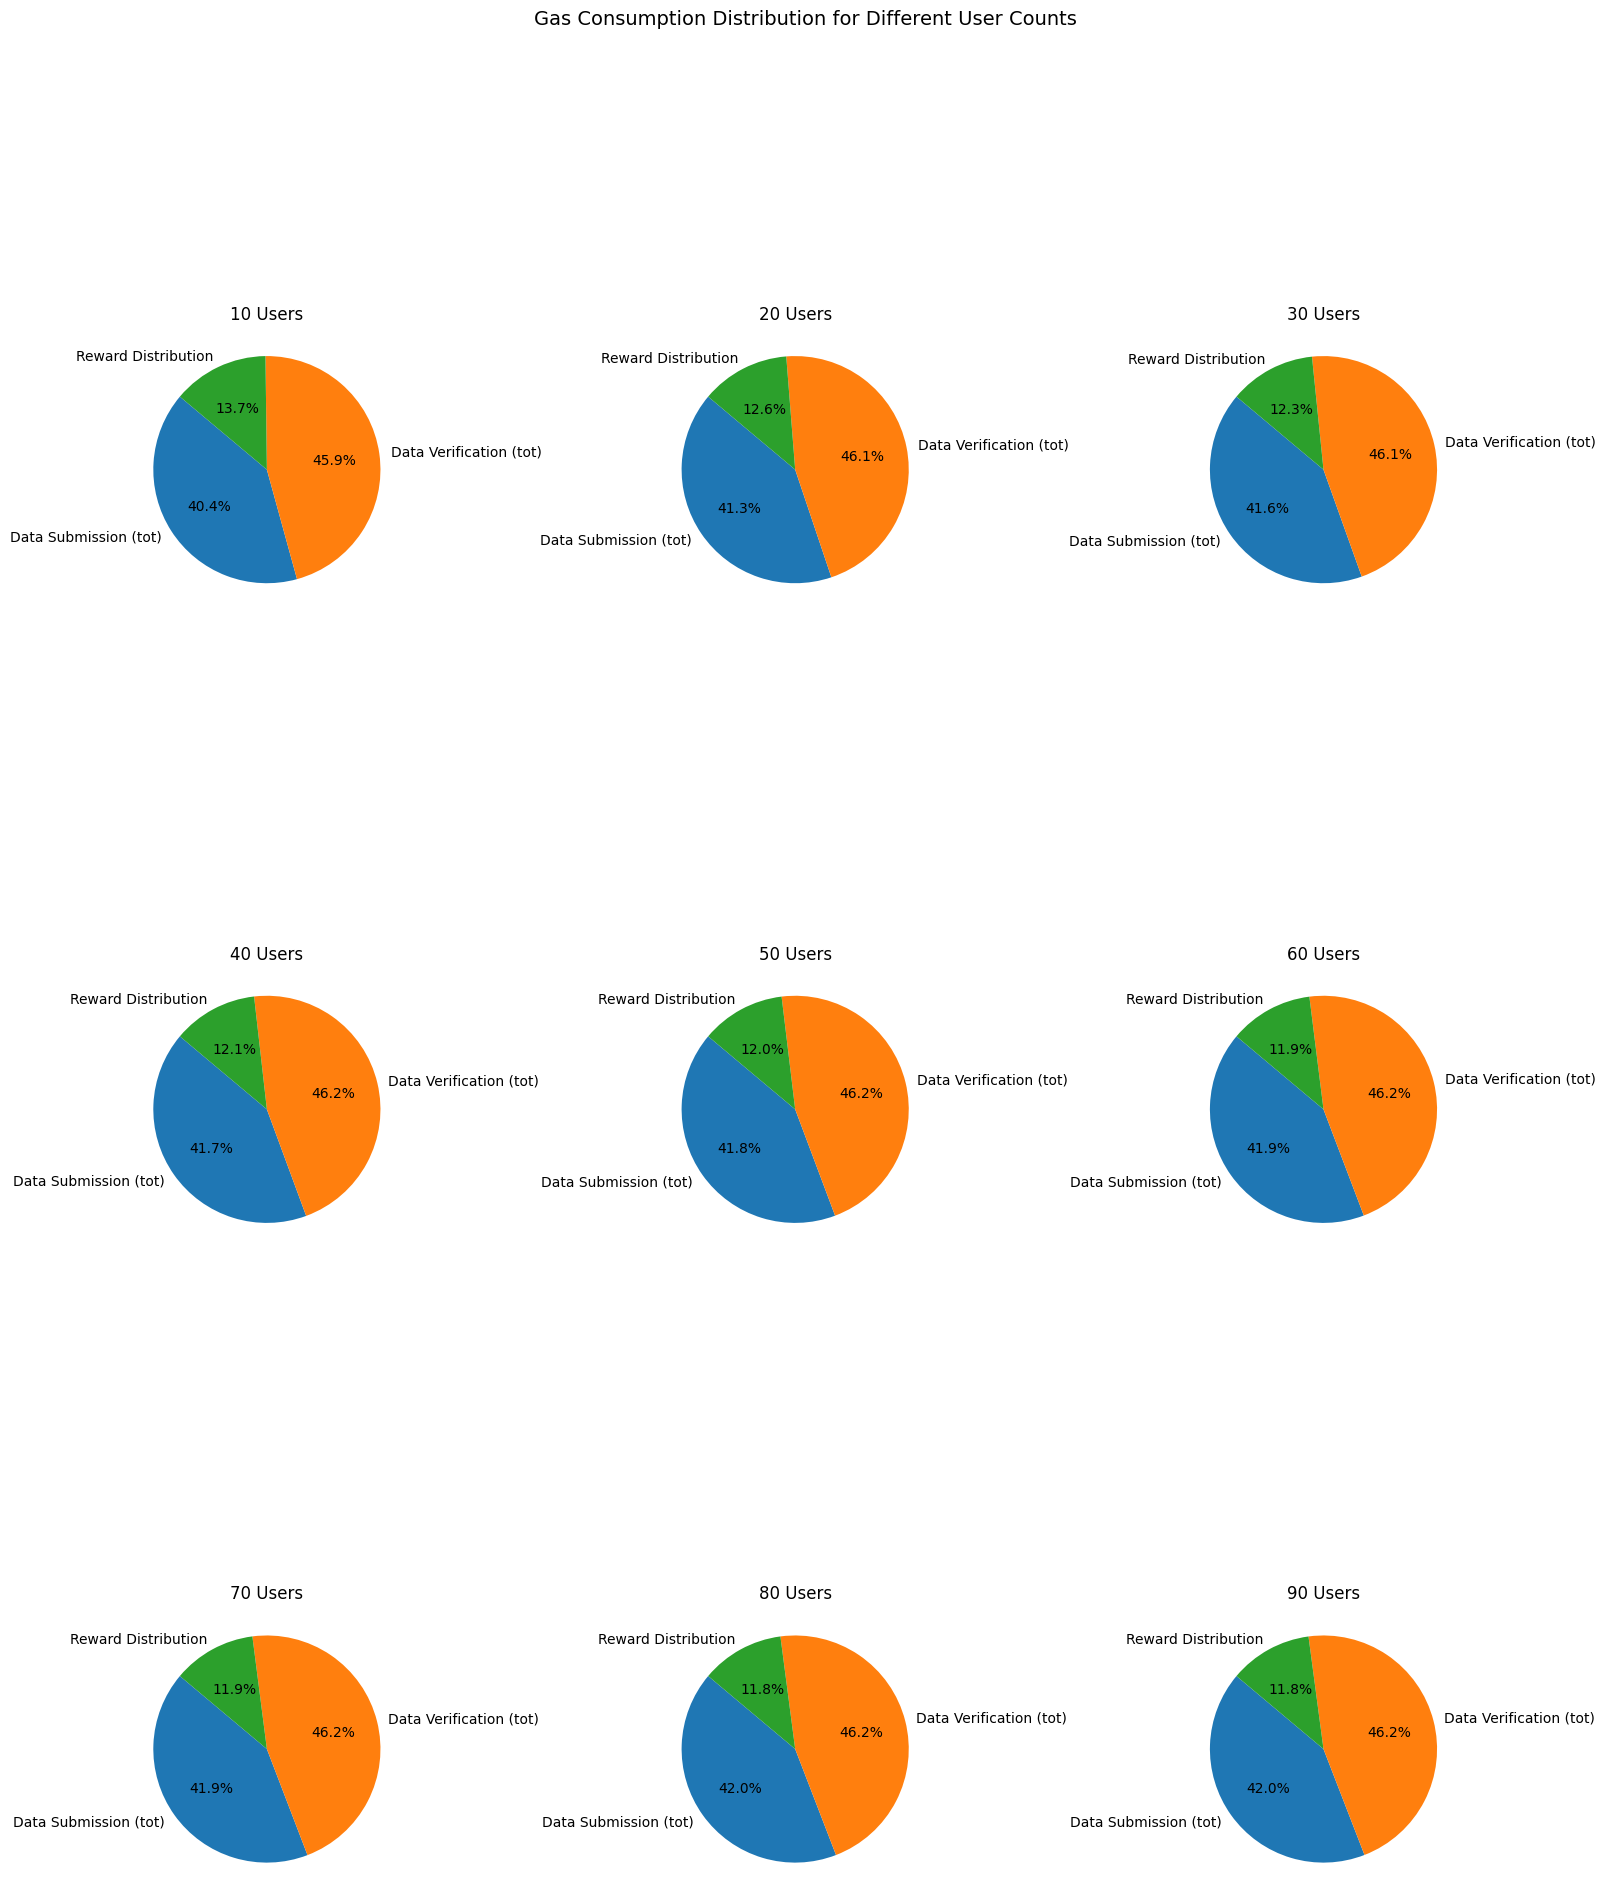

In [13]:
# Show the proportion of gas used in different steps for different number of users
# Define user counts to plot
user_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Define the number of rows and columns for subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 20))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Iterate through each user count and plot a pie chart
for i, user_count in enumerate(user_counts):
    subset = df_medium[df_medium["Number of Users"] == user_count][["Data Submission (tot)", 
                                                      "Data Verification (tot)", 
                                                      "Reward Distribution"]].iloc[0]

    # Create pie chart
    axes[i].pie(subset, labels=subset.index, autopct='%1.1f%%', 
                colors=[colors["Data Submission"], colors["Data Verification"], colors["Reward Distribution"]], startangle=140)
    axes[i].set_title(f"{user_count} Users")

# Adjust layout
plt.tight_layout()
plt.suptitle("Gas Consumption Distribution for Different User Counts", fontsize=14, y=1.05)
plt.show()

## TEST 3: Large

In [14]:
# The text input
text = """
### Testing with 100 users ###
Gas for Data Submission: 8437680
Gas for Data Submission (avg): 84376.8
Gas for Data Verification: 9284744
Gas for Data Verification (avg): 92847.44
Gas for Reward Distribution: 2361042
Total Gas Used: 20083466

### Testing with 150 users ###
Gas for Data Submission: 12657180
Gas for Data Submission (avg): 84381.2
Gas for Data Verification: 13910070
Gas for Data Verification (avg): 92733.8
Gas for Reward Distribution: 3513842
Total Gas Used: 30081092

### Testing with 200 users ###
Gas for Data Submission: 16876680
Gas for Data Submission (avg): 84383.4
Gas for Data Verification: 18535336
Gas for Data Verification (avg): 92676.68
Gas for Reward Distribution: 4666642
Total Gas Used: 40078658

### Testing with 250 users ###
Gas for Data Submission: 21096180
Gas for Data Submission (avg): 84384.72
Gas for Data Verification: 23160638
Gas for Data Verification (avg): 92642.552
Gas for Reward Distribution: 5819442
Total Gas Used: 50076260

### Testing with 300 users ###
Gas for Data Submission: 25315680
Gas for Data Submission (avg): 84385.6
Gas for Data Verification: 27785952
Gas for Data Verification (avg): 92619.84
Gas for Reward Distribution: 6972242
Total Gas Used: 60073874

### Testing with 350 users ###
Gas for Data Submission: 29535180
Gas for Data Submission (avg): 84386.22857142857
Gas for Data Verification: 32411218
Gas for Data Verification (avg): 92603.48
Gas for Reward Distribution: 8125042
Total Gas Used: 70071440

### Testing with 400 users ###
Gas for Data Submission: 33754680
Gas for Data Submission (avg): 84386.7
Gas for Data Verification: 37036544
Gas for Data Verification (avg): 92591.36
Gas for Reward Distribution: 9277842
Total Gas Used: 80069066

### Testing with 450 users ###
Gas for Data Submission: 37974180
Gas for Data Submission (avg): 84387.06666666667
Gas for Data Verification: 41661858
Gas for Data Verification (avg): 92581.90666666666
Gas for Reward Distribution: 10430642
Total Gas Used: 90066680

### Testing with 500 users ###
Gas for Data Submission: 42193680
Gas for Data Submission (avg): 84387.36
Gas for Data Verification: 46287160
Gas for Data Verification (avg): 92574.32
Gas for Reward Distribution: 11583442
Total Gas Used: 100064282
"""

In [15]:
# Extract data and create DataFrame
df_large = extract_gas_data(text)

df_large

,Number of Users,Data Submission (tot),Data Submission (avg),Data Verification (tot),Data Verification (avg),Reward Distribution,Total
0,100,8437680,84376.800000,9284744,92847.440000,2361042,20083466
1,150,12657180,84381.200000,13910070,92733.800000,3513842,30081092
2,200,16876680,84383.400000,18535336,92676.680000,4666642,40078658
3,250,21096180,84384.720000,23160638,92642.552000,5819442,50076260
4,300,25315680,84385.600000,27785952,92619.840000,6972242,60073874
5,350,29535180,84386.228571,32411218,92603.480000,8125042,70071440
6,400,33754680,84386.700000,37036544,92591.360000,9277842,80069066
7,450,37974180,84387.066667,41661858,92581.906667,10430642,90066680
8,500,42193680,84387.360000,46287160,92574.320000,11583442,100064282


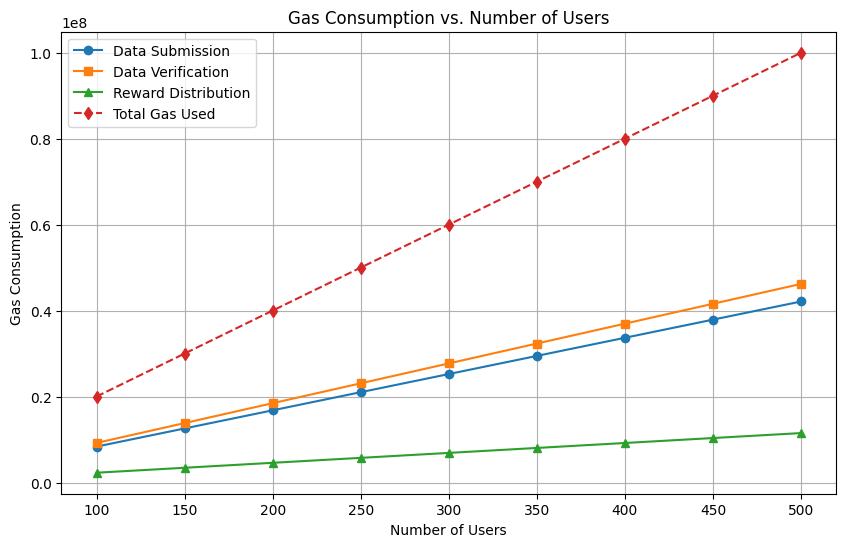

In [16]:
# Show how gas consumption scales with the number of users
plt.figure(figsize=(10, 6))

plt.plot(df_large["Number of Users"], df_large["Data Submission (tot)"], label="Data Submission", marker='o', linestyle='-', color=colors["Data Submission"])
plt.plot(df_large["Number of Users"], df_large["Data Verification (tot)"], label="Data Verification", marker='s', linestyle='-', color=colors["Data Verification"])
plt.plot(df_large["Number of Users"], df_large["Reward Distribution"], label="Reward Distribution", marker='^', linestyle='-', color=colors["Reward Distribution"])
plt.plot(df_large["Number of Users"], df_large["Total"], label="Total Gas Used", marker='d', linestyle='--', color=colors["Total"])

plt.xlabel("Number of Users")
plt.ylabel("Gas Consumption")
plt.title("Gas Consumption vs. Number of Users")
plt.legend()
plt.grid(True)
plt.show()

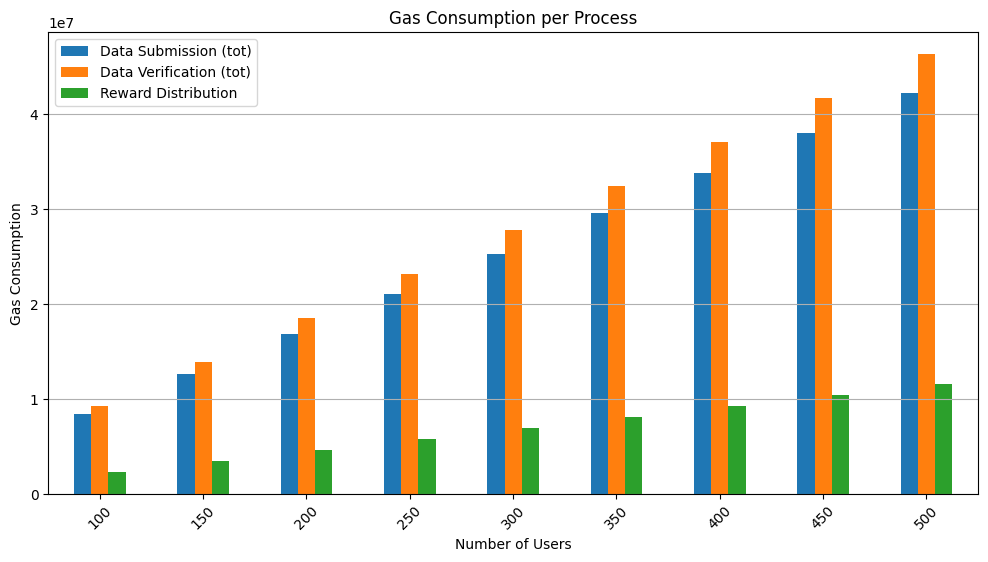

In [17]:
# Compare gas usage across different processes
df_large.set_index("Number of Users")[["Data Submission (tot)", "Data Verification (tot)", "Reward Distribution"]].plot(
    kind="bar", figsize=(12, 6), color=[colors["Data Submission"], colors["Data Verification"], colors["Reward Distribution"]])

plt.xlabel("Number of Users")
plt.ylabel("Gas Consumption")
plt.title("Gas Consumption per Process")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

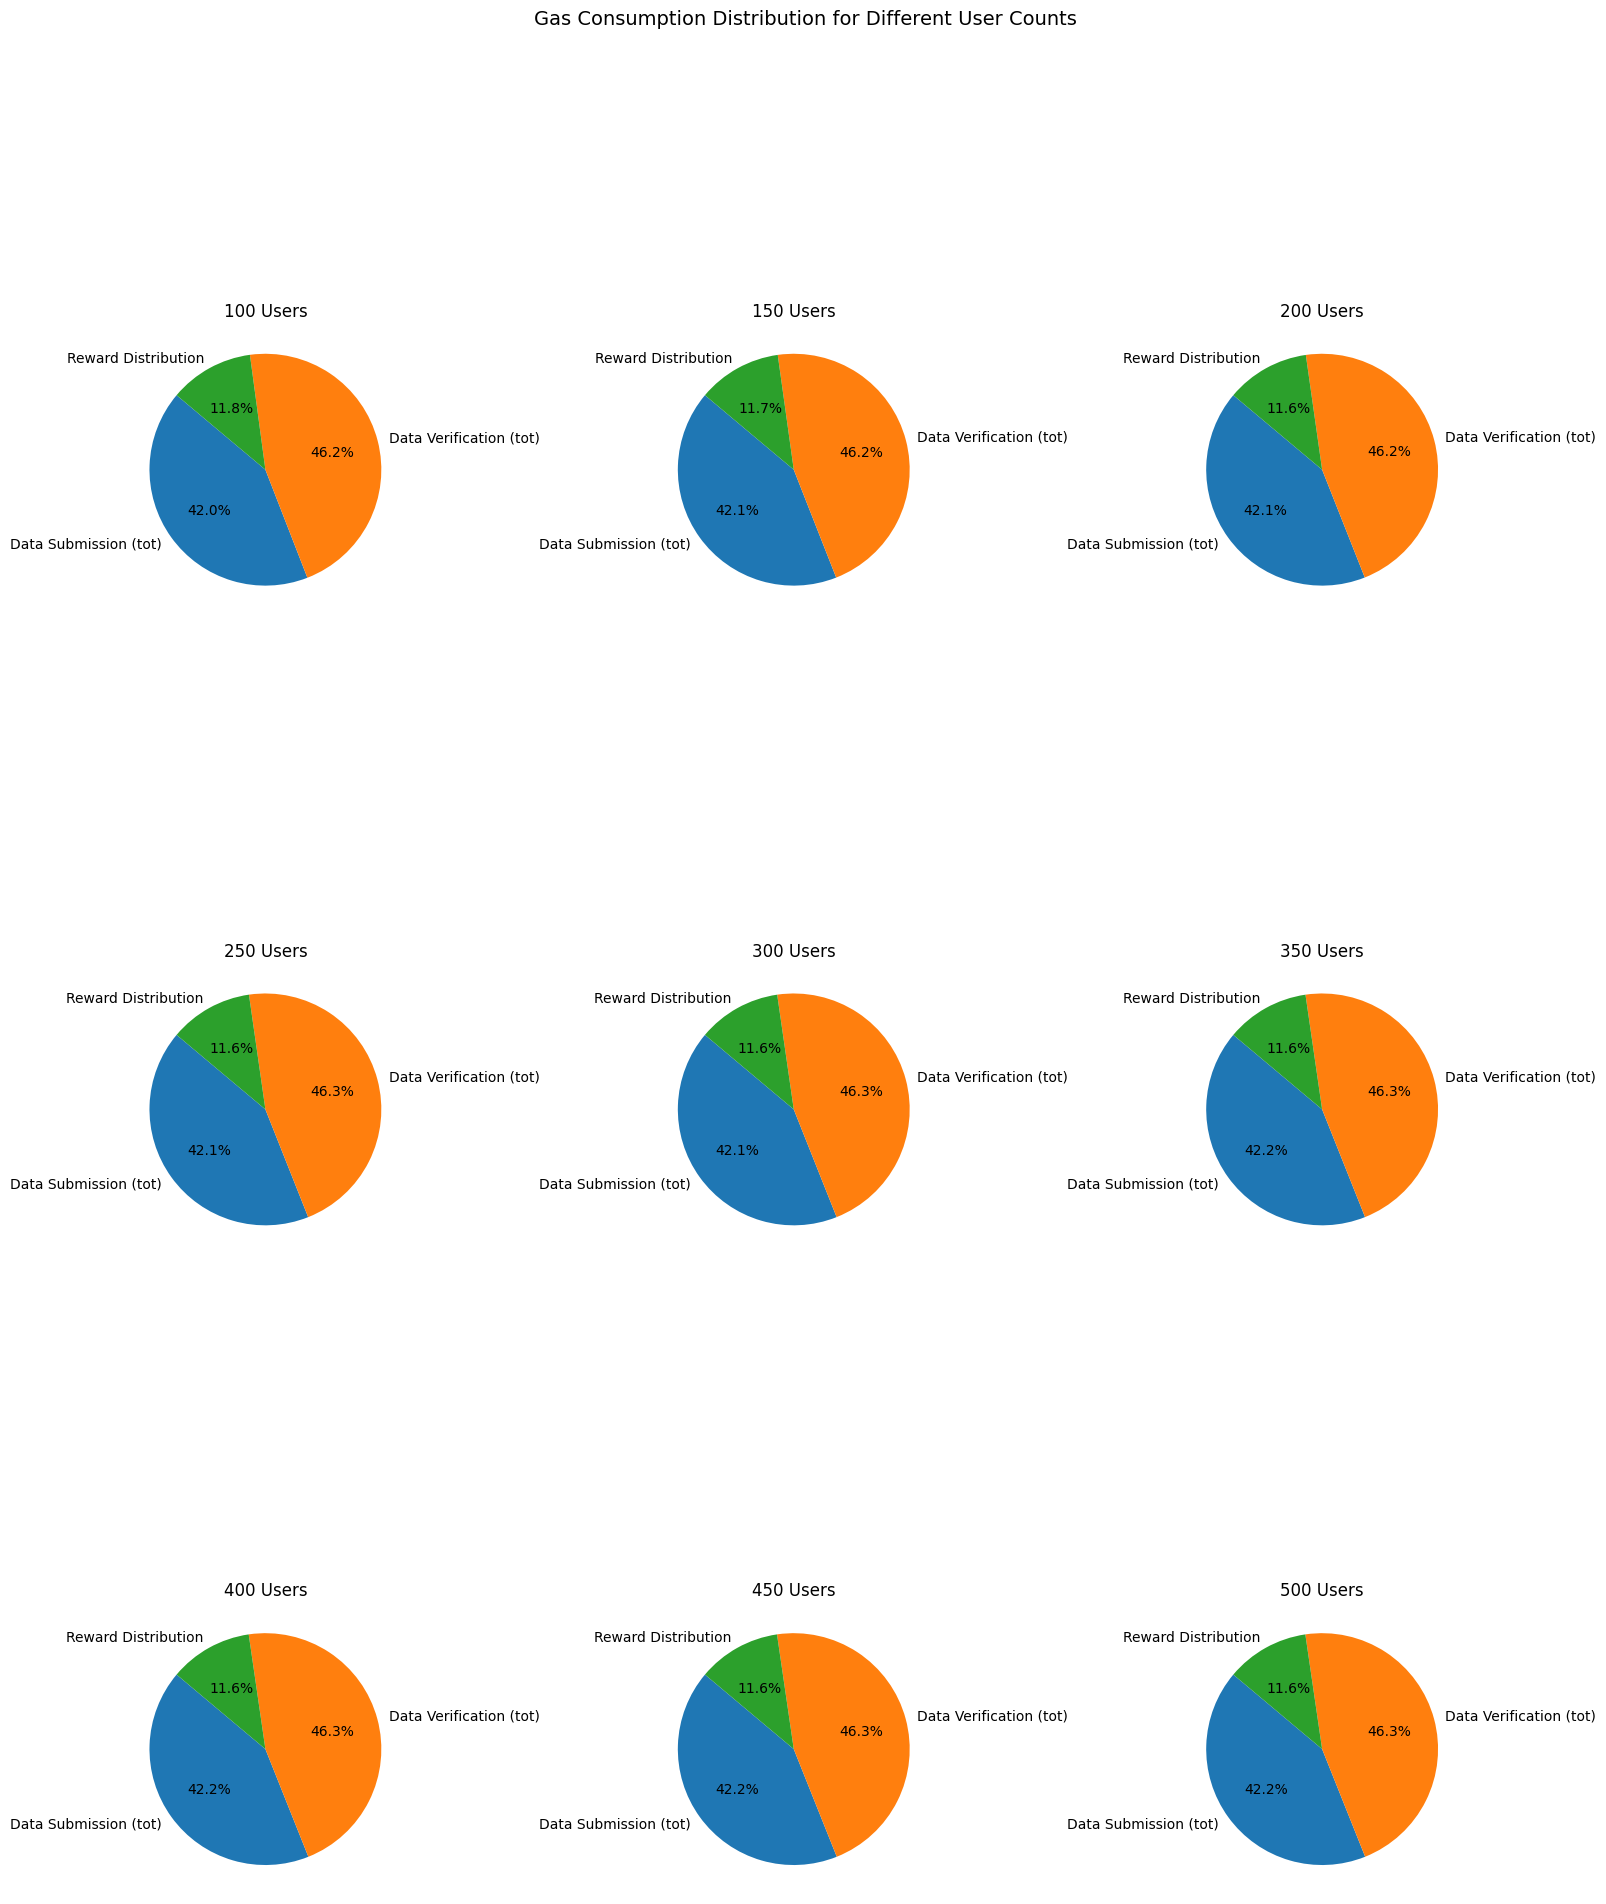

In [18]:
# Show the proportion of gas used in different steps for different number of users
# Define user counts to plot
user_counts = [100, 150, 200, 250, 300, 350, 400, 450, 500]

# Define the number of rows and columns for subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 20))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Iterate through each user count and plot a pie chart
for i, user_count in enumerate(user_counts):
    subset = df_large[df_large["Number of Users"] == user_count][["Data Submission (tot)", 
                                                      "Data Verification (tot)", 
                                                      "Reward Distribution"]].iloc[0]

    # Create pie chart
    axes[i].pie(subset, labels=subset.index, autopct='%1.1f%%', 
                colors=[colors["Data Submission"], colors["Data Verification"], colors["Reward Distribution"]], startangle=140)
    axes[i].set_title(f"{user_count} Users")

# Adjust layout
plt.tight_layout()
plt.suptitle("Gas Consumption Distribution for Different User Counts", fontsize=14, y=1.05)
plt.show()

# Combined Results

In [19]:
# Combine the three DataFrames
df_combined = pd.concat([df_small, df_medium, df_large], ignore_index=True)

# Select only the required columns
selected_columns = [
    "Number of Users",
    "Data Submission (tot)",
    "Data Verification (tot)",
    "Reward Distribution",
    "Total"
]
df_selected = df_combined[selected_columns]

# Rename columns
df_all = df_selected.rename(columns={
    "Data Submission (tot)": "Data Submission",
    "Data Verification (tot)": "Data Verification"
})

In [24]:
df_combined["Reward Distribution (avg)"] = df_combined["Reward Distribution"]/df_combined["Number of Users"]
df_combined["Total (avg)"] = df_combined["Total"]/df_combined["Number of Users"]

In [25]:
df_combined

,Number of Users,Data Submission (tot),Data Submission (avg),Data Verification (tot),Data Verification (avg),Reward Distribution,Total,Reward Distribution (avg),Total (avg)
0,1,84366,84366.000000,126707,126707.000000,78498,289571,78498.000000,289571.000000
1,2,168732,84366.000000,219214,109607.000000,101554,489500,50777.000000,244750.000000
2,3,253098,84366.000000,311721,103907.000000,124610,689429,41536.666667,229809.666667
3,4,337464,84366.000000,404228,101057.000000,147666,889358,36916.500000,222339.500000
4,5,421830,84366.000000,496735,99347.000000,170722,1089287,34144.400000,217857.400000
5,6,506196,84366.000000,589242,98207.000000,193778,1289216,32296.333333,214869.333333
6,7,590562,84366.000000,681737,97391.000000,216834,1489133,30976.285714,212733.285714
7,8,674928,84366.000000,774244,96780.500000,239890,1689062,29986.250000,211132.750000
8,9,759294,84366.000000,866751,96305.666667,262946,1888991,29216.222222,209887.888889
9,10,843660,84366.000000,959258,95925.800000,286002,2088920,28600.200000,208892.000000


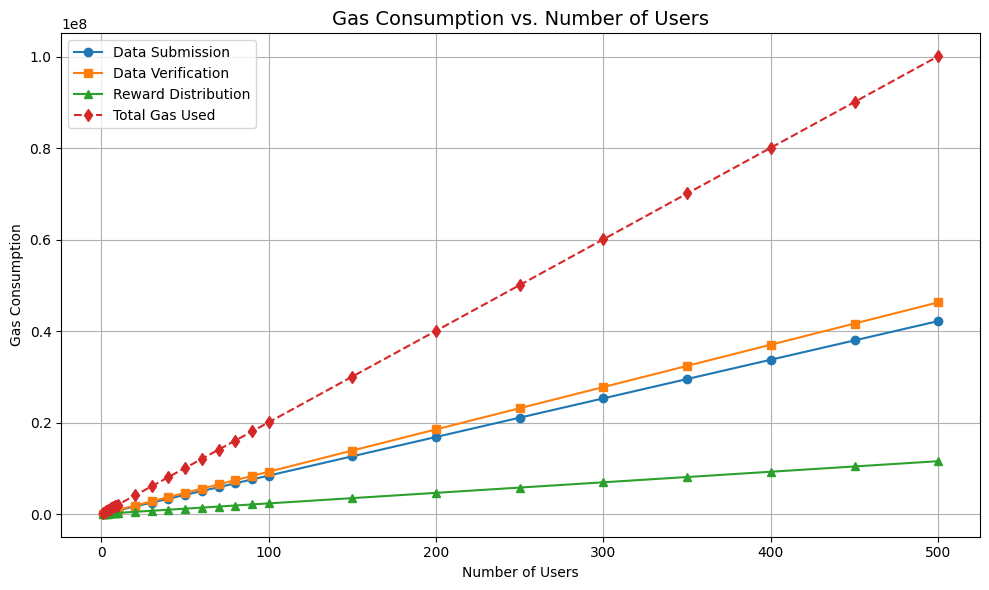

In [21]:
# Show how gas consumption scales with the number of users
plt.figure(figsize=(10, 6))

plt.plot(df_all["Number of Users"], df_all["Data Submission"], label="Data Submission", marker='o', linestyle='-', color=colors["Data Submission"])
plt.plot(df_all["Number of Users"], df_all["Data Verification"], label="Data Verification", marker='s', linestyle='-', color=colors["Data Verification"])
plt.plot(df_all["Number of Users"], df_all["Reward Distribution"], label="Reward Distribution", marker='^', linestyle='-', color=colors["Reward Distribution"])
plt.plot(df_all["Number of Users"], df_all["Total"], label="Total Gas Used", marker='d', linestyle='--', color=colors["Total"])

plt.xlabel("Number of Users")
plt.ylabel("Gas Consumption")
plt.title("Total Gas Consumption vs. Number of Users", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("gas_line.png")
plt.show()

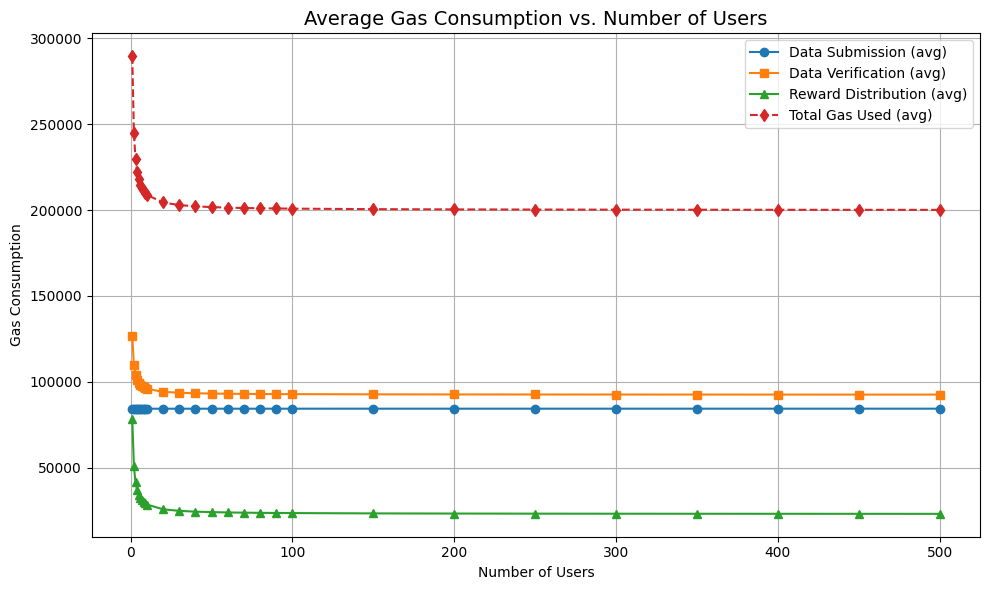

In [29]:
# Show how gas consumption scales with the number of users
plt.figure(figsize=(10, 6))

plt.plot(df_combined["Number of Users"], df_combined["Data Submission (avg)"], label="Data Submission (avg)", marker='o', linestyle='-', color=colors["Data Submission"])
plt.plot(df_combined["Number of Users"], df_combined["Data Verification (avg)"], label="Data Verification (avg)", marker='s', linestyle='-', color=colors["Data Verification"])
plt.plot(df_combined["Number of Users"], df_combined["Reward Distribution (avg)"], label="Reward Distribution (avg)", marker='^', linestyle='-', color=colors["Reward Distribution"])
plt.plot(df_combined["Number of Users"], df_combined["Total (avg)"], label="Total Gas Used (avg)", marker='d', linestyle='--', color=colors["Total"])

plt.xlabel("Number of Users")
plt.ylabel("Gas Consumption")
plt.title("Average Gas Consumption vs. Number of Users", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("gas_line_avg.png")
plt.show()

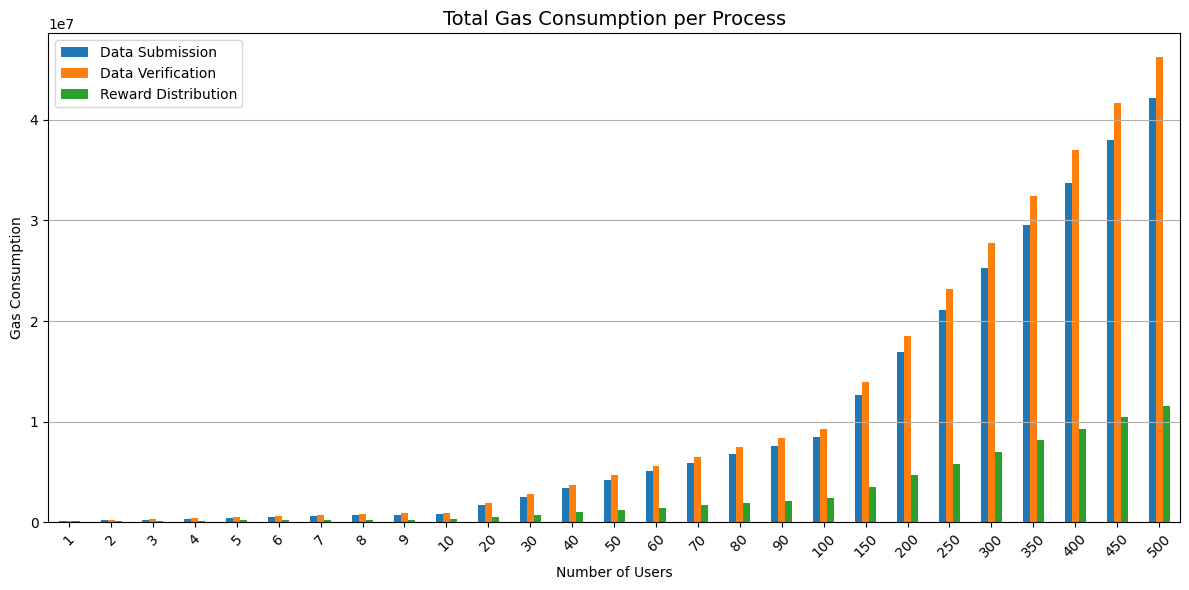

In [31]:
# Compare gas usage across different processes
df_all.set_index("Number of Users")[["Data Submission", "Data Verification", "Reward Distribution"]].plot(
    kind="bar", figsize=(12, 6), color=[colors["Data Submission"], colors["Data Verification"], colors["Reward Distribution"]])

plt.xlabel("Number of Users")
plt.ylabel("Gas Consumption")
plt.title("Total Gas Consumption per Process", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("gas_hist.png")
plt.show()

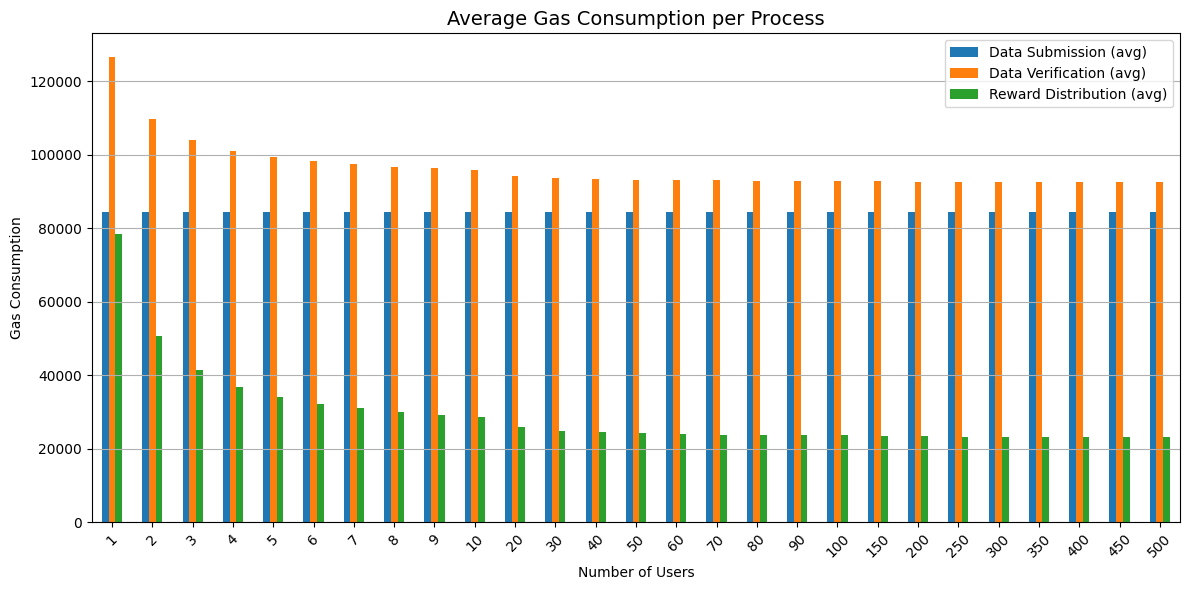

In [32]:
# Compare gas usage across different processes
df_combined.set_index("Number of Users")[["Data Submission (avg)", "Data Verification (avg)", "Reward Distribution (avg)"]].plot(
    kind="bar", figsize=(12, 6), color=[colors["Data Submission"], colors["Data Verification"], colors["Reward Distribution"]])

plt.xlabel("Number of Users")
plt.ylabel("Gas Consumption")
plt.title("Average Gas Consumption per Process", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("gas_hist_avg.png")
plt.show()

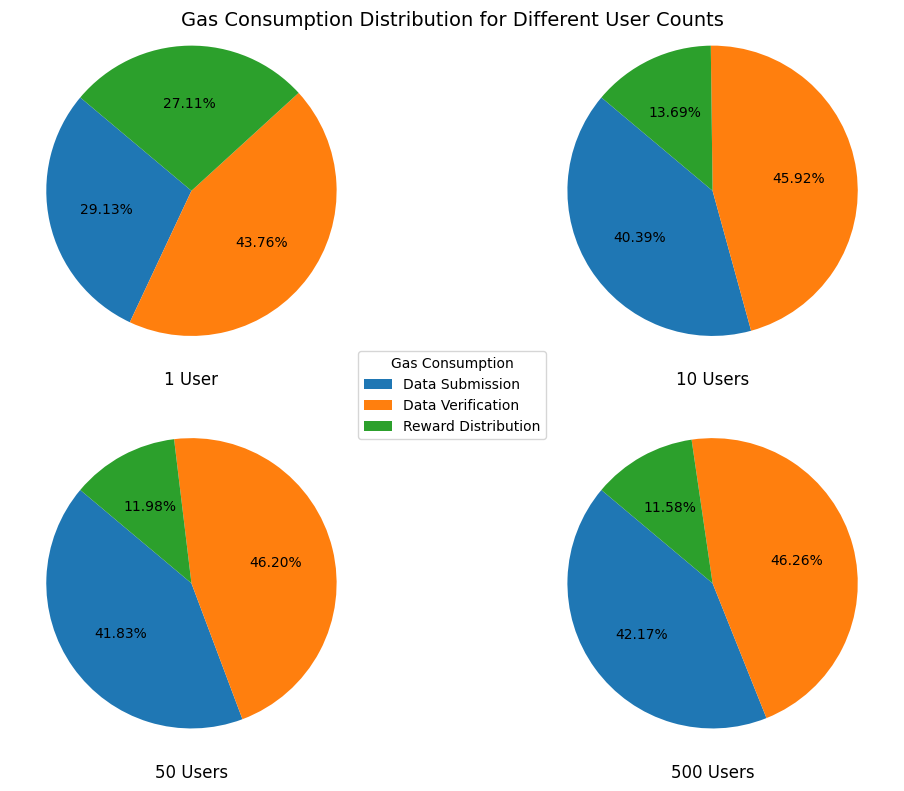

In [23]:
# Show the proportion of gas used in different steps for different number of users
# Define user counts to plot
user_counts = [1, 10, 50, 500]

# Define the number of rows and columns for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Labels and colors for legend
labels = ["Data Submission", "Data Verification", "Reward Distribution"]
color_list = [colors["Data Submission"], colors["Data Verification"], colors["Reward Distribution"]]

# Iterate through each user count and plot a pie chart
for i, user_count in enumerate(user_counts):
    subset = df_all[df_all["Number of Users"] == user_count][labels].iloc[0]

    # Create pie chart without labels (just values)
    wedges, texts, autotexts = axes[i].pie(
        subset,
        labels=None,  # No labels on slices
        autopct='%1.2f%%',  # Show values
        colors=color_list,
        startangle=140
    )
    
    # Remove default title
    axes[i].set_title("")

    # Add custom text below the pie chart
    if user_count > 1:
        subtitle =  f"{user_count} Users"
    else:
        subtitle =  f"{user_count} User"
    axes[i].text(0, -1.3, subtitle, ha='center', va='center', fontsize=12)

# Add a single shared legend outside the plot
fig.legend(wedges, labels, title="Gas Consumption", loc='center')

# Adjust layout
plt.tight_layout()
plt.suptitle("Gas Consumption Distribution for Different User Counts", fontsize=14)
plt.savefig("gas_pie.png")
plt.show()